In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import murraylab_tools.biotek as btek
import itertools

%matplotlib qt5
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
import numpy as np

mpl.font_manager._rebuild()
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

%matplotlib inline
%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Roboto'], 
                 'serif': ['Roboto'],'weight':'normal'})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(8.5,15))

This jupyter notebook takes raw biotek data and generates plots for Figure 3B and C.

In [3]:
btek.tidy_biotek_data('./20190305_diff.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190305_diff_metadata.csv')

In [4]:
data = pd.read_csv('./20190305_diff_tidy.csv')
data_norm = btek.normalize(data)

OD_data = data.loc[data.Channel=='OD600',:]
GFP_data = data.loc[(data.Channel=='sfGFP') & (data.Gain==61),:]
GFP_norm = data_norm.loc[(data_norm.Channel=='sfGFP') & (data_norm.Gain==61),:]
mScarlet_data = data.loc[(data.Channel=='mScarletI') & (data.Gain==100),:]
mScarlet_norm = data_norm.loc[(data_norm.Channel=='mScarletI') & (data.Gain==100),:]

# Get averages and variances from replicates
OD_data_avgs = OD_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
OD_data_vars = OD_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
GFP_data_avgs = GFP_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
GFP_data_vars = GFP_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
GFP_norm_avgs = GFP_norm.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
GFP_norm_vars = GFP_norm.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
OD_data_avgs['std'] = np.sqrt(OD_data_vars['Measurement'].values)
GFP_data_avgs['std'] = np.sqrt(GFP_data_vars['Measurement'].values)
GFP_norm_avgs['std'] = np.sqrt(GFP_norm_vars['Measurement'].values)

OD_data_avgs = OD_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
OD_data_vars = OD_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
mScarlet_data_avgs = mScarlet_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
mScarlet_data_vars = mScarlet_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
mScarlet_norm_avgs = mScarlet_norm.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
mScarlet_norm_vars = mScarlet_norm.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
OD_data_avgs['std'] = np.sqrt(OD_data_vars['Measurement'].values)
mScarlet_data_avgs['std'] = np.sqrt(mScarlet_data_vars['Measurement'].values)
mScarlet_norm_avgs['std'] = np.sqrt(mScarlet_norm_vars['Measurement'].values)


In [6]:
print(GFP_data_avgs.sal.unique())
print(GFP_data_avgs.las.unique())
print(GFP_data_avgs.strain.unique())

[  0.    5.    7.5  10.   15.   30. ]
[  0.    0.1   0.3   1.    3.   10. ]
['BLANK' 'mscar_diff' 'naive_T7' 'naive_T7_2']


C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


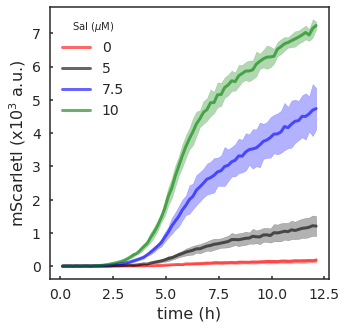

In [8]:
sal_concs = np.array([0,5,7.5,10])
las_concs = np.array([0,0.1,0.3,1,3,10])
fig, ax = plt.subplots(figsize=(5,5))
    

for i, sal_conc in enumerate(sal_concs):
    t = mScarlet_data_avgs.loc[(mScarlet_data_avgs.strain=='mscar_diff') & (mScarlet_data_avgs.sal==sal_conc) &\
                          (mScarlet_data_avgs.las==0),
                                     'Time (hr)'].values
    avg = mScarlet_data_avgs.loc[(mScarlet_data_avgs.strain=='mscar_diff') & (mScarlet_data_avgs.sal==sal_conc)&\
                          (mScarlet_data_avgs.las==0),
                               'Measurement'].values/1000
    std = mScarlet_data_avgs.loc[(mScarlet_data_avgs.strain=='mscar_diff') & (mScarlet_data_avgs.sal==sal_conc)&\
                          (mScarlet_data_avgs.las==0),
                               'std'].values/1000
    ax.plot(t, avg, color=sns.color_palette()[i],linewidth=3,alpha=0.6)

    ax.fill_between(t, avg - std, avg + std,color=sns.color_palette()[i],alpha=0.3)

ax.set_xlabel('time (h)')
ax.set_ylabel('mScarletI (x$10^3$ a.u.)')
ax.legend(['0','5','7.5','10'],title='Sal ($\mu$M)')

Above plot is for Figure 3B.

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


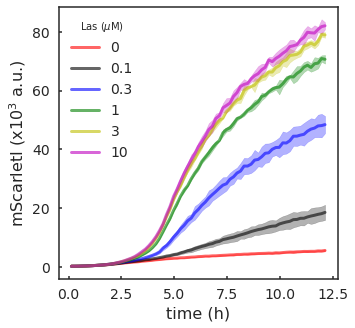

In [10]:
las_concs = np.array([0,0.1,0.3,1,3,10])
fig, ax = plt.subplots(figsize=(5,5))
    

for i, las_conc in enumerate(las_concs):
    t = GFP_data_avgs.loc[(GFP_data_avgs.strain=='mscar_diff') & (GFP_data_avgs.las==las_conc)&\
                          (GFP_data_avgs.sal==0),
                                     'Time (hr)'].values
    avg = GFP_data_avgs.loc[(GFP_data_avgs.strain=='mscar_diff') & (GFP_data_avgs.las==las_conc)&\
                          (GFP_data_avgs.sal==0),
                               'Measurement'].values/1000
    std = GFP_data_avgs.loc[(GFP_data_avgs.strain=='mscar_diff') & (GFP_data_avgs.las==las_conc)&\
                          (GFP_data_avgs.sal==0),
                               'std'].values/1000
    ax.plot(t, avg, color=sns.color_palette()[i],linewidth=3,alpha=0.6)

    ax.fill_between(t, avg - std, avg + std,color=sns.color_palette()[i],alpha=0.3)

ax.set_xlabel('time (h)')
ax.set_ylabel('mScarletI (x$10^3$ a.u.)')
ax.legend(['0','0.1','0.3','1','3','10'],title='Las ($\mu$M)')

Above plot is for Figure 3C